In [87]:
#Bonjour, aujourd'hui je me lance dans la programmation d'un jeu simple afin d'appliquer ce que j'ai appris en cours. Ce jeu consistera simplement à deviner un nombre tiré au hasard.

import random as rd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [88]:
#initialisation des variables nécessaires
guess = 0
jouer = input("Bienvenue sur le jeu GuessTheNumber, souhaitez-vous faire une partie ? Répondre par 'OUI' ou 'NON'. ")

#création des modes de jeu
mode = input("Choisir le mode facile (F) avec 10 essais ou difficile avec 5 essais (D) ")
tentatives = 0
essais = 0
lose = 0
win = 0
suggestion_aide = 0
graph_wl = []

if mode == "F":
  print("Vous avez choisi le mode facile")
  essais = 10
elif mode == "D":
  print("Vous avez choisi le mode difficile")
  essais = 5



Bienvenue sur le jeu GuessTheNumber, souhaitez-vous faire une partie ? Répondre par 'OUI' ou 'NON'. OUI
Choisir le mode facile (F) avec 10 essais ou difficile avec 5 essais (D) F
Vous avez choisi le mode facile


47
Essayez de deviner le nombre : 47
Bravo !
Voici l'évolution de vos tentatives, cela représente l'écart entre le nombre entré par l'utilisateur et le nombre à deviner :  [0]
Souhaitez-vous rejouer ? Répondre par 'OUI' ou 'NON'.OUI
72
Essayez de deviner le nombre : 72
Bravo !
Voici l'évolution de vos tentatives, cela représente l'écart entre le nombre entré par l'utilisateur et le nombre à deviner :  [0]
Souhaitez-vous rejouer ? Répondre par 'OUI' ou 'NON'.OUI
56
Essayez de deviner le nombre : 56
Bravo !
Voici l'évolution de vos tentatives, cela représente l'écart entre le nombre entré par l'utilisateur et le nombre à deviner :  [0]
Souhaitez-vous rejouer ? Répondre par 'OUI' ou 'NON'.OUI
11
Essayez de deviner le nombre : 11
Bravo !
Voici l'évolution de vos tentatives, cela représente l'écart entre le nombre entré par l'utilisateur et le nombre à deviner :  [0]
Souhaitez-vous rejouer ? Répondre par 'OUI' ou 'NON'.OUI
2
Essayez de deviner le nombre : 2
Bravo !
Voici l'évolution de vos 

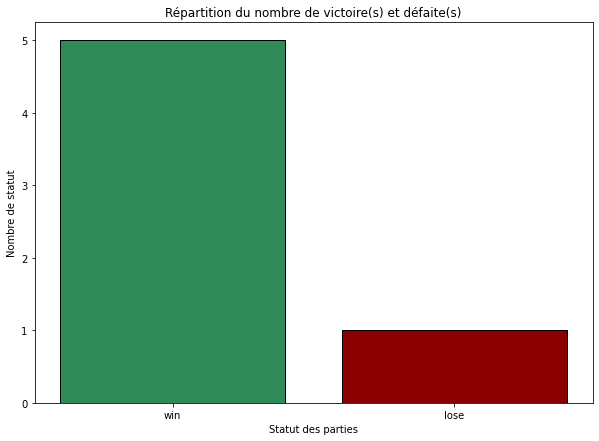

In [89]:
while jouer == "OUI":
  #tirage aléatoire
  tentatives = 0
  number = rd.randrange(0, 101)
  print(number)
  difference = []
  while guess != number and tentatives < essais:
    guess = int(input("Essayez de deviner le nombre : "))
    tentatives += 1
    difference.append(guess - number)

    #création d'une structure conditionnelle qui permet de proposer une suggestion au joueur lorsqu'il choisit le mode facile
    if mode == "F":
      if not(suggestion_aide == number - 1 or suggestion_aide == number + 1):
        if guess < number:
          suggestion_aide = int(guess + ((number - guess) / 2))
          print("Voici une suggestion pour vous aider : %d" % suggestion_aide)
        elif guess > number:
          suggestion_aide = int(number + ((guess - number)/2))
          print("Voici une suggestion pour vous aider : %d" % suggestion_aide)
      else:
        print("Vous êtes très proche. Continuez !")
    
    

    #création des indications au joueur selon la valeur de la variable "guess"
    if guess >= 0 and guess <= 100:
      if guess > number:
        print("C'est moins !")
      if guess < number:
        print("C'est plus !")
    else:
      print("Tu es hors de l'intervalle !")

  else:
    if guess == number:
      print("Bravo !")
      win += 1
      print("Voici l'évolution de vos tentatives, cela représente l'écart entre le nombre entré par l'utilisateur et le nombre à deviner : ", difference)
      jouer = input("Souhaitez-vous rejouer ? Répondre par 'OUI' ou 'NON'.")
      graph_wl.append(win)
    if tentatives == essais:
      print("Perdu !")
      lose += 1
      print("À la première tentative, l'écart était de %d !" % difference[0],"\n", "À la deuxième tentative, l'écart était de %d !" % difference[1],"\n", "À la troisième tentative, l'écart était de %d !" % difference[2])
      jouer = input("Souhaitez-vous rejouer ? Répondre par 'OUI' ou 'NON'.")

else:
  print("Vous avez gagné %d partie(s)"% win, "et perdu %d partie(s), à bientôt !"% lose)
  labels = ["Number of win", "Number of lose"]

  plt.figure(figsize=(10, 7))
  plt.title("Répartition du nombre de victoire(s) et défaite(s)")
  plt.bar(["win", "lose"], [win, lose], color = ["seagreen", "darkred"], edgecolor='black')
  plt.xlabel("Statut des parties")
  plt.ylabel("Nombre de statut")
  plt.show()
  